In [1]:
import torch
import time
from snn_delays.snn import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils import get_device, print_spike_info, propagate_batch, set_seed
from snn_delays.utils.visualization_utils import plot_raster
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Subset, DataLoader
from collections import OrderedDict
device = get_device()

# for reproducibility
set_seed(42)

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


In [2]:
dataset = 'stmnist'
total_time = 100
batch_size = 20

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time)

#### get the indexes for class 0,1, ... 19

train_dataset = DL._dataset.test_dataset
num_classes = DL._dataset.n_classes

class_indices = {}
for idx, (_, label) in enumerate(train_dataset):
    label = np.argmax(label)
    if label not in class_indices:
        class_indices[label] = []
    class_indices[label].append(idx)
    if len(class_indices) == num_classes:
        break
class_indices = dict(sorted(class_indices.items()))
sampled_indices = [np.random.choice(indices) for indices in class_indices.values()]

[ToFrame(sensor_size=(10, 10, 2), time_window=None, event_count=None, n_time_bins=100, n_event_bins=None, overlap=0, include_incomplete=False)]


[ToFrame(sensor_size=(10, 10, 2), time_window=None, event_count=None, n_time_bins=100, n_event_bins=None, overlap=0, include_incomplete=False)]

[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 10.0 ms
mean of normal: 0.4327521295671885
for input layer
total spikes: 2852.0
spikes per sample: 142.6
spikes per timestep: 1.43 / 200
spikes per neuron: 0.71 / 100
spike density: 7.13e-05
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


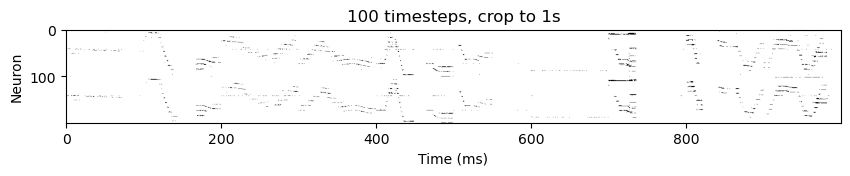

In [11]:
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time)

_, __, dataset_dict = DL.get_dataloaders()

subset = Subset(DL._dataset.test_dataset, sampled_indices)
dataloader = DataLoader(subset, batch_size=len(sampled_indices), shuffle=False)

dataset_dict["time_ms"] = 1e3

snn = SNN(dataset_dict=dataset_dict, structure=(256, 2), connection_type='f',
    delay=None, delay_type='ho', tau_m = 'normal',
    win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device,
    debug=True)

_, __ = propagate_batch(snn, dataloader)
print_spike_info(snn, 'input')
plt.figure(figsize=(10,17))
plt.title("100 timesteps, crop to 1s")
plot_raster(snn, 'input', 10)
plt.gca().set_aspect(0.6)

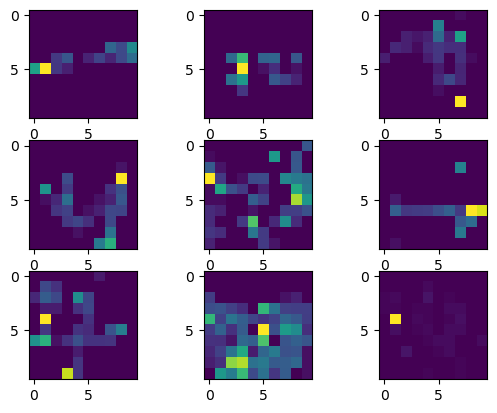

In [7]:
from snn_delays.utils.visualization_utils import frame_2_image
for x in range(9):
    plt.subplot(3,3,x+1)
    plt.imshow(frame_2_image(snn, x))